# A classical ML, supervised learning classification example, using XGBoost & sklearn with pipeline on the [titanic](https://www.kaggle.com/c/titanic) dataset.

#Version information.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import platform   # For checking python version
import sklearn    # For Classifical ML

message = "     Versions     "
print("*" * len(message))
print(message)
print("*" * len(message))
print("Scikit-learn version {}".format(sklearn.__version__))
print("Numpy version {}".format(np.__version__))
print("Pandas version {}".format(pd.__version__))
print("Matplotlib version {}".format(matplotlib.__version__))
print("Python version {}".format(platform.python_version()))

******************
     Versions     
******************
Scikit-learn version 0.22.2.post1
Numpy version 1.19.5
Pandas version 1.1.5
Matplotlib version 3.2.2
Python version 3.7.10


Load data.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/applied_AI_ML/CA1/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/applied_AI_ML/CA1/titanic/test.csv')

Feature extraction

In [ ]:
# Extract prefix from Name.
train['Name_prefix'] = train['Name'].str.split(r"\, |. ", expand=True)[1]
test['Name_prefix'] = test['Name'].str.split(r"\, |. ", expand=True)[1]

print(train['Name_prefix'].head())
print(test['Name_prefix'].head())

0     Mrs
1      Mr
2    Miss
3    Miss
4      Mr
Name: Name_prefix, dtype: object
0      Mr
1    Miss
2      Mr
3    Miss
4      Mr
Name: Name_prefix, dtype: object


In [ ]:
# Convert gender from str to int64.
def convert_gender(col_A):
    convert = []
    for a in col_A:
        if a == 'male': 
            convert.append(1)
        elif a == 'female': 
            convert.append(2)        
        else: 
            convert.append(0)     

    return convert

train['gender'] = convert_gender(train['Sex']) 
test['gender'] = convert_gender(test['Sex'])

print(train['gender'])
print(test['gender'])

0      2
1      1
2      2
3      2
4      1
      ..
892    2
893    2
894    2
895    1
896    1
Name: gender, Length: 897, dtype: int64
0      1
1      2
2      1
3      2
4      1
      ..
407    1
408    1
409    1
410    1
411    1
Name: gender, Length: 412, dtype: int64


In [ ]:
# Band Age into bins.

train['Age_bin'] = pd.cut(train['Age'].fillna(train['Age'].median()), bins=[0,15,30,45,60,999], labels=[5,4,3,2,1])
test['Age_bin'] = pd.cut(test['Age'].fillna(test['Age'].median()), bins=[0,15,30,45,60,999], labels=[5,4,3,2,1])

train['Age_bin'] = train['Age_bin'].astype('int64')
test['Age_bin'] = test['Age_bin'].astype('int64')

print(train['Age_bin'])
print(test['Age_bin'])

print(type(train['Age_bin']))

0      2
1      4
2      3
3      4
4      4
      ..
892    4
893    2
894    3
895    3
896    3
Name: Age_bin, Length: 897, dtype: int64
0      4
1      3
2      4
3      4
4      3
      ..
407    2
408    2
409    1
410    4
411    4
Name: Age_bin, Length: 412, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
# Extract prefix & numbers from Ticket.
train['Ticket_prefix'] = train['Ticket'].str.split(r"[0-9]", expand=True)[0]
test['Ticket_prefix'] = test['Ticket'].str.split(r"[0-9]", expand=True)[0]

train['Ticket_num'] = train['Ticket'].str.replace(r"\D+",'0')
test['Ticket_num'] = test['Ticket'].str.replace(r"\D+",'0')

def convert_Ticket_num(col):
    """
    Convert items from str to float.
    """
    nums = []
    for i, r in enumerate(col):          
        nums.append((float(r)))

    return nums

train['Ticket_num'] = convert_Ticket_num(train['Ticket_num'])
test['Ticket_num'] = convert_Ticket_num(test['Ticket_num'])

print(train['Ticket_prefix'].head())
print(test['Ticket_prefix'].head())

print(train['Ticket_num'].head())
print(test['Ticket_num'].head())

0       
1       
2    PC 
3    PC 
4       
Name: Ticket_prefix, dtype: object
0       
1    PC 
2       
3       
4       
Name: Ticket_prefix, dtype: object
0     11751.0
1    111369.0
2     17757.0
3     17483.0
4     13905.0
Name: Ticket_num, dtype: float64
0     11967.0
1     17760.0
2    110564.0
3     36928.0
4    110489.0
Name: Ticket_num, dtype: float64


In [ ]:
# Count the number of cabins that corresponds to each passenger.
def Cabin_count(col):
    """
    Store number of cabins of each row in count.
    """
    count = []
    for r in col:
        if type(r) == str:
            count.append(len(r))
        else:
            count.append(0)

    return count


train['Cabin_count'] = pd.DataFrame(Cabin_count(train['Cabin']))
test['Cabin_count'] = pd.DataFrame(Cabin_count(test['Cabin']))

print(train['Cabin_count'].head())
print(test['Cabin_count'].head())

0    3
1    4
2    0
3    3
4    0
Name: Cabin_count, dtype: int64
0    3
1    3
2    3
3    2
4    3
Name: Cabin_count, dtype: int64


In [ ]:
# convert Embarked from alphabets to numbers based on median fare.

# Notice that C corresponds to the highest median fare & Q the lowest.
print(train['Embarked'].value_counts())
print(train.groupby(['Embarked'])['Fare'].median())

def convert_Embarked(col_A):
    """
    Convert Embarked alphabets to numbers.
    """
    convert = []
    for a in col_A:
        if a == 'Q': 
            convert.append(1)
        elif a == 'S': 
            convert.append(2)
        elif a == 'C': 
            convert.append(3)            
        else:
            convert.append(0)    

    return convert

train['Embarked_num'] = convert_Embarked(train['Embarked'])
test['Embarked_num'] = convert_Embarked(test['Embarked'])

print(train['Embarked_num'])
print(test['Embarked_num'])

S    634
C    181
Q     80
Name: Embarked, dtype: int64
Embarked
C    28.50000
Q     7.75000
S    14.00415
Name: Fare, dtype: float64
0      2
1      3
2      3
3      2
4      3
      ..
892    2
893    3
894    3
895    3
896    2
Name: Embarked_num, Length: 897, dtype: int64
0      3
1      2
2      2
3      2
4      2
      ..
407    2
408    3
409    2
410    2
411    3
Name: Embarked_num, Length: 412, dtype: int64


#Feature engineering.

In [ ]:
# Engineer artificial composite features based on feature correlations.

train['gender_d_Pclass'] = train['gender'] / train['Pclass']
test['gender_d_Pclass'] = test['gender'] / test['Pclass']
train['gender_p_Age_bin'] = train['gender'] + train['Age_bin']
test['gender_p_Age_bin'] = test['gender'] + test['Age_bin']
train['gender_p_Parch'] = train['gender'] + train['Parch']
test['gender_p_Parch'] = test['gender'] + test['Parch']
train['gender_p_SibSp'] = train['gender'] + train['SibSp']
test['gender_p_SibSp'] = test['gender'] + test['SibSp']
train['gender_p_Cabin_count'] = train['gender'] + train['Cabin_count']
test['gender_p_Cabin_count'] = test['gender'] + test['Cabin_count']
train['gender_p_Embarked_num'] = train['gender'] + train['Embarked_num']
test['gender_p_Embarked_num'] = test['gender'] + test['Embarked_num']

train['gender_m_Fare'] = train['gender'] * train['Fare']
test['gender_m_Fare'] = test['gender'] * test['Fare']

train['Fare_d_Pclass'] = train['Fare'] / train['Pclass']
test['Fare_d_Pclass'] = test['Fare'] / test['Pclass']
train['Fare_p_Cabin_count'] = train['Fare'] + train['Cabin_count']
test['Fare_p_Cabin_count'] = test['Fare'] + test['Cabin_count']
train['Fare_p_Embarked_num'] = train['Fare'] + train['Embarked_num']
test['Fare_p_Embarked_num'] = test['Fare'] + test['Embarked_num']

# Data visualization & analysis.

###Display data type of features in train dataframe.

In [ ]:
# Check for numerical or categorical data
train.dtypes

PassengerId                int64
Survived                   int64
Pclass                     int64
Name                      object
Sex                       object
Age                      float64
SibSp                      int64
Parch                      int64
Ticket                    object
Fare                     float64
Cabin                     object
Embarked                  object
Name_prefix               object
gender                     int64
Age_bin                    int64
Ticket_prefix             object
Ticket_num               float64
Cabin_count                int64
Embarked_num               int64
gender_d_Pclass          float64
gender_p_Age_bin           int64
gender_p_Parch             int64
gender_p_SibSp             int64
gender_p_Cabin_count       int64
gender_p_Embarked_num      int64
gender_m_Fare            float64
Fare_d_Pclass            float64
Fare_p_Cabin_count       float64
Fare_p_Embarked_num      float64
dtype: object

###Number of unique values in each feature.

In [ ]:
print("PassengerId", train['PassengerId'].nunique())
print("Survived", train['Survived'].nunique())
print("Pclass", train['Pclass'].nunique())
print("Name", train['Name'].nunique())
print("Sex", train['Sex'].nunique())
print("Age", train['Age'].nunique())
print("SibSp", train['SibSp'].nunique())
print("Parch", train['Parch'].nunique())
print("Ticket", train['Ticket'].nunique())
print("Fare", train['Fare'].nunique())
print("Cabin", train['Cabin'].nunique())
print("Embarked", train['Embarked'].nunique())
print()
print("Name_prefix", train['Name_prefix'].nunique())
print("gender", train['gender'].nunique())
print("Age_bin", train['Age_bin'].nunique())
print("Ticket_prefix", train['Ticket_prefix'].nunique())
print("Ticket_num", train['Ticket_num'].nunique())
print("Cabin_count", train['Cabin_count'].nunique())
print("Embarked_num", train['Embarked_num'].nunique())

PassengerId 897
Survived 2
Pclass 3
Name 895
Sex 2
Age 85
SibSp 7
Parch 8
Ticket 683
Fare 242
Cabin 147
Embarked 3

Name_prefix 27
gender 2
Age_bin 5
Ticket_prefix 42
Ticket_num 682
Cabin_count 9
Embarked_num 4


###Display first 5 rows of train & test dataframes.

In [ ]:
# Dislay train data.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_prefix,gender,Age_bin,Ticket_prefix,Ticket_num,Cabin_count,Embarked_num,gender_d_Pclass,gender_p_Age_bin,gender_p_Parch,gender_p_SibSp,gender_p_Cabin_count,gender_p_Embarked_num,gender_m_Fare,Fare_d_Pclass,Fare_p_Cabin_count,Fare_p_Embarked_num
0,1,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs,2,2,,11751.0,3,2,2.0,4,3,3,5,4,105.1084,52.5542,55.5542,54.5542
1,2,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,4,,111369.0,4,3,1.0,5,1,1,5,4,30.0000,30.0000,34.0000,33.0000
2,3,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,Miss,2,3,PC,17757.0,0,3,2.0,5,2,2,2,5,455.0500,227.5250,227.5250,230.5250
3,4,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,Miss,2,4,PC,17483.0,3,2,2.0,6,2,2,5,4,443.5584,221.7792,224.7792,223.7792
4,5,0,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,Mr,1,4,,13905.0,0,3,1.0,5,1,1,1,4,26.0000,26.0000,26.0000,29.0000


In [ ]:
# Dislay test data.
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_prefix,gender,Age_bin,Ticket_prefix,Ticket_num,Cabin_count,Embarked_num,gender_d_Pclass,gender_p_Age_bin,gender_p_Parch,gender_p_SibSp,gender_p_Cabin_count,gender_p_Embarked_num,gender_m_Fare,Fare_d_Pclass,Fare_p_Cabin_count,Fare_p_Embarked_num
0,6,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C,Mr,1,4,,11967.0,3,3,1.0,5,1,2,4,4,91.0792,91.0792,94.0792,94.0792
1,8,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,Miss,2,3,PC,17760.0,3,2,2.0,5,2,2,5,4,271.2666,135.6333,138.6333,137.6333
2,9,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S,Mr,1,4,,110564.0,3,2,1.0,5,1,1,4,3,26.5500,26.5500,29.5500,28.5500
3,12,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,Miss,2,4,,36928.0,2,2,2.0,6,2,2,4,4,329.7334,164.8667,166.8667,166.8667
4,14,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,D22,S,Mr,1,3,,110489.0,3,2,1.0,4,1,1,4,3,26.5500,26.5500,29.5500,28.5500


###Display description of train dataframe.

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,897.0,6.482531e+02,3.783510e+02,1.000000,317.000000,644.000000,981.0000,1.309000e+03
Survived,897.0,3.879599e-01,4.875572e-01,0.000000,0.000000,0.000000,1.0000,1.000000e+00
Pclass,897.0,2.280936e+00,8.419816e-01,1.000000,1.000000,3.000000,3.0000,3.000000e+00
Age,724.0,3.025552e+01,1.457411e+01,0.333300,21.000000,28.000000,39.0000,7.600000e+01
SibSp,897.0,5.195095e-01,1.091724e+00,0.000000,0.000000,0.000000,1.0000,8.000000e+00
Parch,897.0,4.169454e-01,9.014265e-01,0.000000,0.000000,0.000000,0.0000,9.000000e+00
Fare,897.0,3.431115e+01,5.244674e+01,0.000000,7.925000,15.050000,31.3875,5.123292e+02
gender,897.0,1.369008e+00,4.828053e-01,1.000000,1.000000,1.000000,2.0000,2.000000e+00
Age_bin,897.0,3.586399e+00,8.873831e-01,1.000000,3.000000,4.000000,4.0000,5.000000e+00
Ticket_num,897.0,5.274123e+06,3.139357e+07,0.000000,17421.000000,113572.000000,348122.0000,2.031013e+08


###Check missing data.

Missing Values 
 PassengerId                0
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                      173
SibSp                      0
Parch                      0
Ticket                     0
Fare                       0
Cabin                    685
Embarked                   2
Name_prefix                0
gender                     0
Age_bin                    0
Ticket_prefix              0
Ticket_num                 0
Cabin_count                0
Embarked_num               0
gender_d_Pclass            0
gender_p_Age_bin           0
gender_p_Parch             0
gender_p_SibSp             0
gender_p_Cabin_count       0
gender_p_Embarked_num      0
gender_m_Fare              0
Fare_d_Pclass              0
Fare_p_Cabin_count         0
Fare_p_Embarked_num        0
dtype: int64


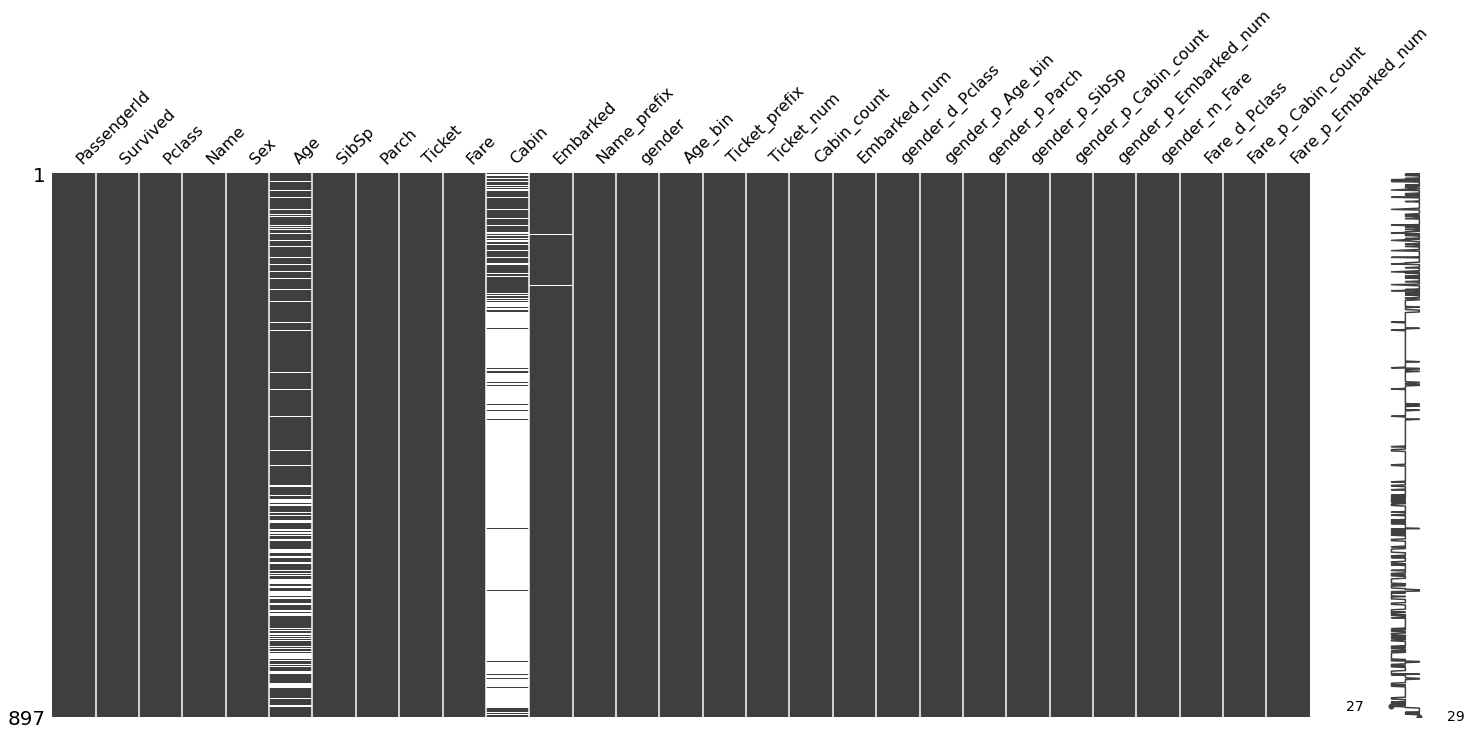

In [ ]:
# Check for missing data
# Generating the summary
print('Missing Values \n', train.isnull().sum())

# Generating a distribution of the missing values
import missingno as msno

msno.matrix(train)

###Display correlation between numerical features.


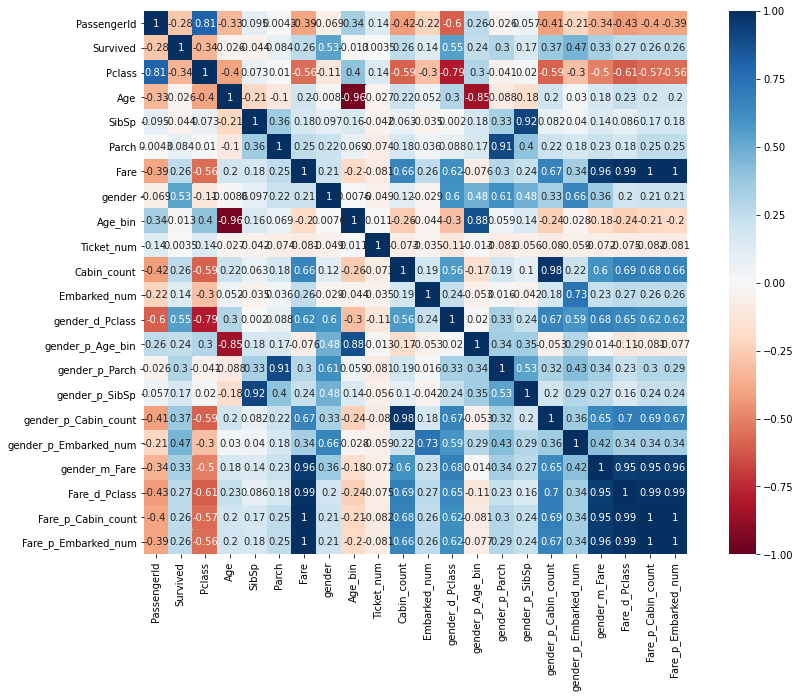

In [ ]:
# Correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,10))
sns.heatmap(train.corr(),square=True,annot=True,cmap='RdBu',vmin=-1,vmax=1)
plt.show()

###Display pair plot.

In [ ]:
#sns.pairplot(train.dropna(), kind='scatter', diag_kind='kde')
#plt.show()

###Display pair plot using target label 'Survived' as hue.

In [ ]:
#sns.pairplot(train.dropna(), hue="Survived", size=2)
#plt.show()

###Drop the unused/unwanted columns in the train dataframe.

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Name_prefix        object
gender              int64
Age_bin          category
Ticket_prefix      object
Ticket_num         object
Cabin_count         int64
Embarked_num        int64
dtype: object

In [ ]:
train = train.drop(['PassengerId', 
                    'Pclass',
                    'Name', 
                    #'Sex',
                    'Age', 
                    'SibSp', 
                    'Parch', 
                    'Ticket',
                    'Fare',
                    'Cabin',                    
                    'Embarked',                    
                    #'Name_prefix',      # new
                    'gender',
                    'Age_bin',
                    'Ticket_prefix', 
                    'Ticket_num', 
                    'Cabin_count', 
                    'Embarked_num',   
                    ],                    
                   axis=1)

#Data Preparation

1.   Randomized train data.
2.   Separate the feature from the label
3.   Use SMOTE for upsampling. 
4.   Handle the Categorical and Numeric data separately
5.   Handle Missing

In [ ]:
# Randomized all rows in the train dataset.
train = train.sample(frac=1.0, random_state=22)

In [ ]:
# Separate the features from the label
# The label here is the Load Status

X = train.drop('Survived', axis= 1)
y = train['Survived']

#print(X.head().T)
#print(y.head())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)  
print(len(X_train), len(y_train))

X_train_cols = X_train.columns
#y_train_cols = y_train.columns

717 717


###Install SMOTE.

In [ ]:
!pip install smote

####Use SMOTE for upsampling.

In [ ]:
X_train 

,Sex,Name_prefix,gender_d_Pclass,gender_p_Age_bin,gender_p_Parch,gender_p_SibSp,gender_p_Cabin_count,gender_p_Embarked_num,gender_m_Fare,Fare_d_Pclass,Fare_p_Cabin_count,Fare_p_Embarked_num
241,female,Mrs,1.000000,5,2,2,2,4,26.0000,6.500000,13.0000,15.0000
447,male,Mr,0.333333,5,1,1,1,3,7.8958,2.631933,7.8958,9.8958
880,male,Mr,0.333333,5,1,1,1,4,7.2250,2.408333,7.2250,10.2250
690,male,Mr,0.333333,5,1,1,1,3,8.0500,2.683333,8.0500,10.0500
66,male,Mr,1.000000,2,5,2,12,3,263.0000,263.000000,274.0000,265.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
405,female,Mrs,0.666667,5,3,3,2,4,40.5000,6.750000,20.2500,22.2500
807,male,Mr,0.333333,5,1,1,1,3,9.5000,3.166667,9.5000,11.5000
721,female,Mrs,0.666667,6,2,3,2,3,31.0000,5.166667,15.5000,16.5000
530,male,Mr,0.333333,4,1,1,1,3,6.9750,2.325000,6.9750,8.9750


In [ ]:
print('Missing Values \n', X_train.isnull().sum())


Missing Values 
 Sex                      0
Name_prefix              0
gender_d_Pclass          0
gender_p_Age_bin         0
gender_p_Parch           0
gender_p_SibSp           0
gender_p_Cabin_count     0
gender_p_Embarked_num    0
gender_m_Fare            0
Fare_d_Pclass            0
Fare_p_Cabin_count       0
Fare_p_Embarked_num      0
dtype: int64


In [ ]:

# Using SMOTE to upsample train data.
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTENC

kn = int(len(X_train)*0.05)
print(kn)
smote_nc = SMOTENC(categorical_features=[0,1,2,4,5,6,7,8], k_neighbors=kn, random_state=22)
X_train_sm, y_train_sm = smote_nc.fit_resample(X_train, y_train)

X_train, y_train = X_train_sm, y_train_sm
print(len(X_train), len(y_train))
print(X_train, y_train)
print(type(X_train), type(y_train))

X_train = pd.DataFrame(data=X_train)
y_train = pd.DataFrame(data=y_train)
X_train.columns = X_train_cols
#y_train.columns = y_train_cols
print(X_train.T, y_train)
print(type(X_train), type(y_train))


0.4.3
35
878 878
[['female' 'Mrs' 1.0 ... 6.5 13.0 15.0]
 ['male' 'Mr' 0.3333333333333333 ... 2.6319333333333335 7.8958
  9.895800000000001]
 ['male' 'Mr' 0.3333333333333333 ... 2.408333333333333 7.225 10.225]
 ...
 ['female' 'Mrs' 2.0 ... 152.713147009468 153.16111232990727
  154.713147009468]
 ['female' 'Miss' 1.0 ... 13.351107676619408 26.702215353238817
  28.702215353238817]
 ['female' 'Miss' 0.6666666666666666 ... 2.9264375896508636
  8.779312768952591 11.069015589777177]] [1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 

In [ ]:
#Separate the Categorical and Numerical Data
#Separate the numeric data
numeric_data = X.select_dtypes(include=['float64', 'int64']).columns
#Separate the categorical data
categorical_data = X.select_dtypes(include=['object', 'category', ]).columns

print(numeric_data)
print(categorical_data)

Index(['gender_d_Pclass', 'gender_p_Age_bin', 'gender_p_Parch',
       'gender_p_SibSp', 'gender_p_Cabin_count', 'gender_p_Embarked_num',
       'gender_m_Fare', 'Fare_d_Pclass', 'Fare_p_Cabin_count',
       'Fare_p_Embarked_num'],
      dtype='object')
Index(['Sex', 'Name_prefix'], dtype='object')


###Install & import category_encoders.

https://contrib.scikit-learn.org/category_encoders/index.html

In [ ]:
!pip install category_encoders

from category_encoders import TargetEncoder, BinaryEncoder, CatBoostEncoder, WOEEncoder, LeaveOneOutEncoder, JamesSteinEncoder

#Creating Pipeline for the model.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA 


#Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
  ('imputer', SimpleImputer(strategy='median')),  
  ('scaler', StandardScaler()),        
  #('scaler', MinMaxScaler(feature_range=(-1,1))),        
  ('transform', PowerTransformer()),        
  ('pca', PCA()),                              
])

#Categorical Transformation Pipeline
categorical_transformer = Pipeline(steps = [
  ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
  #('onehot', OneHotEncoder(handle_unknown='ignore')),
  ('bin_encoder', BinaryEncoder(verbose=0)),
  ('cat_encoder', CatBoostEncoder(verbose=0)),
])

### Compose the 2 transformers.


In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numeric_transformer, numeric_data),
                  ('cat', categorical_transformer, categorical_data)
])

###Install XGboost.

In [ ]:
!pip install xgboost

###Create pipeline.

In [ ]:
# Combine the preprocessor with the Estimator

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier     
#from sklearn.naive_bayes import GaussianNB      
import xgboost as xgb

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', xgb.XGBClassifier(objective='binary:logistic', 
                                                   tree_method='gpu_hist')),     # Use GPU (Need to change Colab runtime type to use GPU).                                              
                       #('classifier', GradientBoostingClassifier()),
                       ])

# Training.


###Algorithm comparison.
#### Quick visual inspection on the performance of various estimator including pre-built Ensemble

LogisticRegression score: 0.828
Perceptron score: 0.800
SGDClassifier score: 0.822
KNeighborsClassifier score: 0.794
SVC score: 0.844
SVC score: 0.817
NuSVC score: 0.839
DecisionTreeClassifier score: 0.767
RandomForestClassifier score: 0.861
AdaBoostClassifier score: 0.856
GradientBoostingClassifier score: 0.867
XGBClassifier score: 0.867


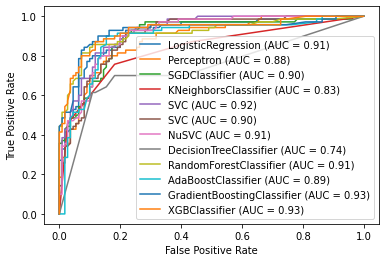

In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()

#Create a list of classifiers to do a quick test
classifiers = [
    LogisticRegression(),
    Perceptron(),
    SGDClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    SVC(),
    SVC(kernel="rbf", C= 0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier(objective='binary:logistic', 
                      tree_method='gpu_hist'),     # Use GPU (Need to change Colab runtime type to use GPU).                       
]

for clf in classifiers:
    pipe_grp = Pipeline(steps=[
                  ('preprocessor',preprocessor),
                  ('classifier',clf)
                  ])
    pipe_grp.fit(X_train, y_train)
    print("%s score: %.3f" % (clf.__class__.__name__, pipe_grp.score(X_test, y_test)))
    roc_disp = plot_roc_curve(pipe_grp, X_test, y_test, ax=ax, name='{}'.format(clf.__class__.__name__))
    
plt.show()

###Hyperparameter tuning.

In [ ]:
xgb.XGBClassifier().get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [ ]:
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# specify parameters and distributions to sample from
param_dist = {'classifier__max_depth': [3, 5, 7],
              'classifier__n_estimators': [100, 300, 500],
              'classifier__learning_rate': [0.1, 0.05, 0.01],
              }

grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=param_dist)                                   

# run randomized search
n_iter_search=10
random_search = RandomizedSearchCV(estimator=pipe, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring ='roc_auc',
                                   cv=5)

start = time()
#best_model = grid_search.fit(X_train, y_train)
best_model = random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
#print(grid_search.cv_results_)              
#print(random_search.cv_results_)              

RandomizedSearchCV took 50.06 seconds for 10 candidates parameter settings.


In [ ]:
#Get the estimator model
best_classifier = best_model.best_estimator_
#Print out the hyperparameters
params = best_classifier['classifier'].get_params()
print("Best max_depth:", params['max_depth'])
print("Best n_estimators:", params['n_estimators'])
print("Best learning_rate:", params['learning_rate'])

Best max_depth: 3
Best n_estimators: 300
Best learning_rate: 0.1


### Validation and Evaluation.

In [ ]:
from sklearn import metrics
y_pred = best_model.predict(X_test)
print(y_pred)

#Summarise the fit of the classifier_model
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

[0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       110
           1       0.81      0.81      0.81        70

    accuracy                           0.86       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.86      0.86      0.86       180

[[97 13]
 [13 57]]


### ROC Curve

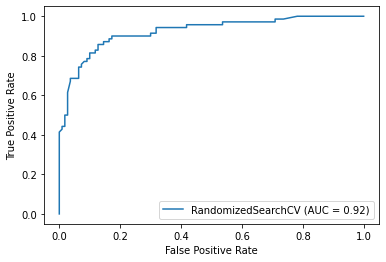

In [ ]:
roc_disp = plot_roc_curve(best_model, X_test, y_test)

###Feature importance.

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_train, y_train, n_repeats=3, random_state=22)

In [ ]:
importances_mean_df = pd.DataFrame(data=result.importances_mean.reshape(1,len(X_train.columns)), columns= X_train.columns)
print("Feature importance mean:")
print((importances_mean_df.T)[0].sort_values())
importances_std_df = pd.DataFrame(data=result.importances_std.reshape(1,len(X_train.columns)), columns= X_train.columns)
print()
print("Feature importance std:")
print((importances_std_df.T)[0].sort_values())

Feature importance mean:
Sex                      0.008472
Name_prefix              0.038515
gender_p_Parch           0.069768
gender_p_SibSp           0.079422
gender_p_Age_bin         0.085724
gender_p_Embarked_num    0.090314
gender_p_Cabin_count     0.094252
Fare_d_Pclass            0.147924
gender_m_Fare            0.149778
Fare_p_Cabin_count       0.163593
gender_d_Pclass          0.177193
Fare_p_Embarked_num      0.197454
Name: 0, dtype: float64

Feature importance std:
Sex                      0.000524
gender_p_Cabin_count     0.001422
gender_p_Embarked_num    0.002186
Name_prefix              0.002974
gender_p_SibSp           0.003589
gender_p_Parch           0.004586
gender_p_Age_bin         0.007882
gender_m_Fare            0.008440
gender_d_Pclass          0.008814
Fare_p_Embarked_num      0.011040
Fare_p_Cabin_count       0.012490
Fare_d_Pclass            0.018872
Name: 0, dtype: float64


# Predict test data from file (unlabeled test set).

In [ ]:
y_pred = best_model.predict(test)
print(y_pred)

y_pred = pd.DataFrame(y_pred, columns=['Survived'])
print(y_pred)
print(y_pred.value_counts(normalize=True))
print(y_pred.value_counts())

results = pd.concat([test['PassengerId'], y_pred], axis=1)
print(results)

results.to_csv('submission.csv', index=False)
print(pd.read_csv('submission.csv'))

[1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0
 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 1]
     Survived
0           1
1           1
2           0
3           1
4           1
..        ...
407         0
408         1
409         0
410         1
411      